In [22]:
import pandas as pd ; import numpy as np
data=pd.read_csv('./fuga_clientes_empresa_telefonica_construccion.csv')
data_explot=pd.read_csv('./fuga_clientes_empresa_telefonica_explotacion.csv')
#que es network age, dummy_encoding, todas las posibilidades que hay de tratar outliers y sus razones
data = pd.get_dummies(data, columns=['Most Loved Competitor network in Month 2'], dtype= int, drop_first= True)
data = pd.get_dummies(data, columns=['Most Loved Competitor network in Month 1'], dtype= int, drop_first= True)
data = pd.get_dummies(data, columns=['Network type subscription in Month 1'], dtype= int, drop_first= True)
data = pd.get_dummies(data, columns=['Network type subscription in Month 2'], dtype= int, drop_first= True)


data_explot = pd.get_dummies(data_explot, columns=['Most Loved Competitor network in Month 2'], dtype= int, drop_first= True)
data_explot = pd.get_dummies(data_explot, columns=['Most Loved Competitor network in Month 1'], dtype= int, drop_first= True)
data_explot = pd.get_dummies(data_explot, columns=['Network type subscription in Month 1'], dtype= int, drop_first= True)
data_explot = pd.get_dummies(data_explot, columns=['Network type subscription in Month 2'], dtype= int, drop_first= True)

data=data.drop('Customer ID',axis=1)
print(len(data.columns))



16
26
columna que hemos eliminado: Network type subscription in Month 1_Other


25

In [20]:
#eliminar la fila con valor nulo en print('valores nulos:')
data.isnull().sum()
#NO BORRAMOS VALORES NULOS YA QUE EN LAS COLS DONDE HABIA NaN SE NOS INFORMABA DE QUE NO SE CONOCÍA DICHA INFORMACIÓN, 
#PERO SE PUEDE TRABAJAR CON LA FILA YA QUE NO ES INFORMACIÓN REALMENTE RELEVANTE
#UNA VEZ HEMOS HECHO DUMMIES YA NO NOS QUEDAN VALORES NULOS,

network_age                                          0
Customer tenure in month                             0
Total Spend in Months 1 and 2 of 2017                0
Total SMS Spend                                      0
Total Data Spend                                     0
Total Data Consumption                               0
Total Unique Calls                                   0
Total Onnet spend                                    0
Total Offnet spend                                   0
Total Call centre complaint calls                    0
Churn Status                                         0
Most Loved Competitor network in Month 2_PQza        0
Most Loved Competitor network in Month 2_ToCall      0
Most Loved Competitor network in Month 2_Uxaa        0
Most Loved Competitor network in Month 2_Weematel    0
Most Loved Competitor network in Month 2_Zintel      0
Most Loved Competitor network in Month 1_Mango       0
Most Loved Competitor network in Month 1_PQza        0
Most Loved

In [7]:
data_num = pd.DataFrame(data.loc[:, data.dtypes != object])

def is_outlier_IQR(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR = Q3-Q1
    return (df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR))

def transformacion_log(elemento):
    '''con apply podremos aplicar esta transformacion a cada elemento de cada columna con outliers'''
    return np.log(elemento)+1


print('outliers:')
is_outlier_IQR(data_num).sum()

#eiminar la fila con valor nulo en 




outliers:


network_age                                5
Customer tenure in month                   5
Total Spend in Months 1 and 2 of 2017     62
Total SMS Spend                          111
Total Data Spend                         114
Total Data Consumption                   157
Total Unique Calls                       101
Total Onnet spend                        120
Total Offnet spend                       145
Total Call centre complaint calls        124
Churn Status                               0
dtype: int64

In [8]:
cols_outliers=['network_age','Customer tenure in month','Total Spend in Months 1 and 2 of 2017','Total Call centre complaint calls','Total Offnet spend', 'Total Onnet spend','Total Unique Calls','Total Data Consumption','Total Data Spend','Total SMS Spend']

data=data[cols_outliers].apply(transformacion_log)  #APLICAMOS TRANSFORMACIÓN SOLO EN COLS DONDE HAY OUTLIERS

data_num = pd.DataFrame(data.loc[:, data.dtypes != object])  
print('outliers después de la transformación:')
is_outlier_IQR(data_num).sum()



outliers después de la transformación:


C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


network_age                                1
Customer tenure in month                   1
Total Spend in Months 1 and 2 of 2017      5
Total Call centre complaint calls         61
Total Offnet spend                        35
Total Onnet spend                        252
Total Unique Calls                         0
Total Data Consumption                     0
Total Data Spend                         223
Total SMS Spend                          191
dtype: int64

In [4]:

print(len(data_num))
is_outlier = is_outlier_IQR(data_num)
data_num = data_num[~is_outlier.any(axis=1)]
print(len(data_num))


1111
588


In [5]:


print(len(data_num),len(data))

588 1111


In [6]:
is_outlier

,network_age,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total Call centre complaint calls,Total Offnet spend,Total Onnet spend,Total Unique Calls,Total Data Consumption,Total Data Spend,Total SMS Spend
0,False,False,False,False,False,False,False,False,True,True
1,False,False,False,False,False,True,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
1106,False,False,True,True,False,False,False,False,False,False
1107,False,False,False,False,False,False,False,False,False,False
1108,False,False,False,False,False,True,False,False,False,True
1109,False,False,False,False,False,False,False,False,False,False


In [7]:

# Eliminación de todas las filas que contienen algún valor atípico:
data_num=data_num[~is_outlier.any(axis = 1)]  #solo salen filas que pasadas por is_outlier devuelvan false
is_outlier.sum()

C:\Users\juanj\AppData\Local\Temp\ipykernel_13448\1126237896.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_num=data_num[~is_outlier.any(axis = 1)]  #solo salen filas que pasadas por is_outlier devuelvan false


network_age                                1
Customer tenure in month                   1
Total Spend in Months 1 and 2 of 2017      5
Total Call centre complaint calls         61
Total Offnet spend                        35
Total Onnet spend                        252
Total Unique Calls                         0
Total Data Consumption                     0
Total Data Spend                         223
Total SMS Spend                          191
dtype: int64

In [8]:

print('duplicados en la primary key:')
print(data['Customer ID'].duplicated().any())

duplicados en la primary key:


KeyError: 'Customer ID'

valores nulos:


Customer ID                                  0
network_age                                  0
Customer tenure in month                     0
Total Spend in Months 1 and 2 of 2017        0
Total SMS Spend                              0
Total Data Spend                             0
Total Data Consumption                       0
Total Unique Calls                           0
Total Onnet spend                            0
Total Offnet spend                           0
Total Call centre complaint calls            0
Network type subscription in Month 1         0
Network type subscription in Month 2        22
Most Loved Competitor network in Month 1     1
Most Loved Competitor network in Month 2     1
Churn Status                                 0
dtype: int64

b) network_age

network_age
False    1111
Name: count, dtype: int64

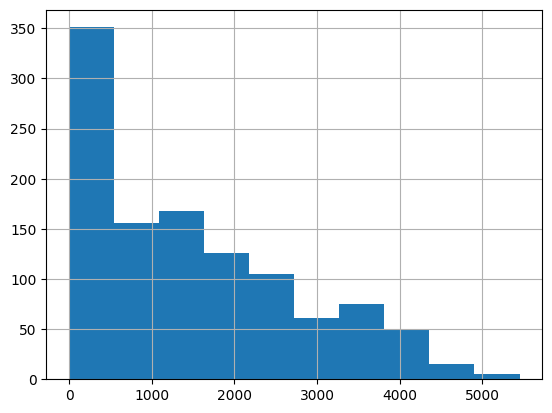

In [ ]:
#TODAS LAS COLS CON OUTLIERS TIENEN COLA PESADA
data['network_age'].hist()
is_outlier_IQR(data['Total Call centre complaint calls']).value_counts()

data['network_age'].isna().value_counts()

d) Total Spend in Months 1 and 2 of 2017

# Total Data Spend

# Total Unique Calls

# Total Offnet spend

# Network type subscription in Month 1

# Most Loved Competitor network in in Month 1

# Churn Status (variable a predecir)